# Code Description

In [1]:
## This code is written by Sajjad Nassirpour, PhD student at electrical engineering at University of Codolardo Denver
## This code is about "Ordinary Procedure" of the paper "On Duality of Stability and Capacity Regions in Interference Networks".

# Import Packages

In [2]:
from scipy.stats import bernoulli
import numpy as np
import pandas as pd
from scipy.stats import poisson
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

        


## Function for finding the row of origin queues in Control Table

In [3]:
## ---- Calculation for finding the row in control table ---- ##

def ctrl_I_finder(number_of_packets_Q1,number_of_packets_Q2):
    if number_of_packets_Q1[0,0]!=0:
        if number_of_packets_Q2[0,0]!=0:
            pointer_1=0
            pointer_2=0
            control_num=15
        elif number_of_packets_Q2[0,1]!=0:
            pointer_1=0
            pointer_2=1
            control_num=12
        elif number_of_packets_Q2[0,3]!=0:
            pointer_1=0
            pointer_2=3
            control_num=13
        elif number_of_packets_Q2[0,2]!=0:
            pointer_1=0
            pointer_2=2
            control_num=14
        elif number_of_packets_Q2[0,4]!=0:
            pointer_1=0
            pointer_2=4
            control_num=21

        
    elif number_of_packets_Q1[0,1]!=0:
        if number_of_packets_Q2[0,0]!=0:
            pointer_1=1
            pointer_2=0
            control_num=9
        elif number_of_packets_Q2[0,1]!=0:
            pointer_1=1
            pointer_2=1
            control_num=0
        elif number_of_packets_Q2[0,3]!=0:
            pointer_1=1
            pointer_2=3
            control_num=1
        elif number_of_packets_Q2[0,2]!=0:
            pointer_1=1
            pointer_2=2
            control_num=2
        elif number_of_packets_Q2[0,4]!=0:
            pointer_1=1
            pointer_2=4
            control_num=22

            
    elif number_of_packets_Q1[0,2]!=0:
        if number_of_packets_Q2[0,0]!=0:
            pointer_1=2
            pointer_2=0
            control_num=10
        elif number_of_packets_Q2[0,1]!=0:
            pointer_1=2
            pointer_2=1
            control_num=3
        elif number_of_packets_Q2[0,3]!=0:
            pointer_1=2
            pointer_2=3
            control_num=4
        elif number_of_packets_Q2[0,2]!=0:
            pointer_1=2
            pointer_2=2
            control_num=5
        elif number_of_packets_Q2[0,4]!=0:
            pointer_1=2
            pointer_2=4
            control_num=23
            
            
    elif number_of_packets_Q1[0,3]!=0:
        if number_of_packets_Q2[0,0]!=0:
            pointer_1=3
            pointer_2=0
            control_num=11
        elif number_of_packets_Q2[0,1]!=0:
            pointer_1=3
            pointer_2=1
            control_num=6
        elif number_of_packets_Q2[0,3]!=0:
            pointer_1=3
            pointer_2=3
            control_num=7
        elif number_of_packets_Q2[0,2]!=0:
            pointer_1=3
            pointer_2=2
            control_num=8
        elif number_of_packets_Q2[0,4]!=0:
            pointer_1=3
            pointer_2=4
            control_num=24 
            
            
    elif number_of_packets_Q1[0,4]!=0:
        if number_of_packets_Q2[0,0]!=0:
            pointer_1=4
            pointer_2=0
            control_num=16
        elif number_of_packets_Q2[0,1]!=0:
            pointer_1=4
            pointer_2=1
            control_num=17
        elif number_of_packets_Q2[0,3]!=0:
            pointer_1=4
            pointer_2=3
            control_num=19
        elif number_of_packets_Q2[0,2]!=0:
            pointer_1=4
            pointer_2=2
            control_num=18
        elif number_of_packets_Q2[0,4]!=0:
            pointer_1=4
            pointer_2=4
            control_num=20
          
      
    return pointer_1,pointer_2,control_num


## Function for finding the SN number

In [4]:
def case_cal(q11,q12,q21,q22):
    if q11==1 and q12==1 and q21==1 and q22==1:
        case_num=1
    elif q11==1 and q12==1 and q21==0 and q22==1:
        case_num=2
    elif q11==1 and q12==0 and q21==1 and q22==1:
        case_num=3
    elif q11==1 and q12==0 and q21==0 and q22==1:
        case_num=4
    elif q11==1 and q12==0 and q21==0 and q22==0:
        case_num=5
    elif q11==1 and q12==1 and q21==0 and q22==0:
        case_num=6
    elif q11==1 and q12==0 and q21==1 and q22==0:
        case_num=7
    elif q11==1 and q12==1 and q21==1 and q22==0:
        case_num=8
    elif q11==0 and q12==0 and q21==0 and q22==1:
        case_num=9
    elif q11==0 and q12==0 and q21==1 and q22==1:
        case_num=10
    elif q11==0 and q12==1 and q21==0 and q22==1:
        case_num=11
    elif q11==0 and q12==1 and q21==1 and q22==1:
        case_num=12
    elif q11==0 and q12==0 and q21==1 and q22==0:
        case_num=13
    elif q11==0 and q12==1 and q21==0 and q22==0:
        case_num=14
    elif q11==0 and q12==1 and q21==1 and q22==0:
        case_num=15
    elif q11==0 and q12==0 and q21==0 and q22==0:
        case_num=16
    return case_num


# Function for packet movement when only T1 has packet to send

In [5]:
def T1_select(number_of_packets_Q1,q11,q12):
    if number_of_packets_Q1[0,0]!=0:
        pointer_1=0
        if q11==1 and q12==1:
            Q_des_Q1=6
        elif q11==1 and q12==0:
            Q_des_Q1=4
        elif q11==0 and q12==1:
            Q_des_Q1=3
        elif q11==0 and q12==0:
            Q_des_Q1=1

    elif number_of_packets_Q1[0,1]!=0:
        pointer_1=1
        if q11==1 and q12==1:
            Q_des_Q1=6
        elif q11==1 and q12==0:
            Q_des_Q1=6
        elif q11==0 and q12==1:
            Q_des_Q1=3
        elif q11==0 and q12==0:
            Q_des_Q1=2
    elif number_of_packets_Q1[0,2]!=0:
        pointer_1=2
        if q11==1 and q12==1:
            Q_des_Q1=6
        elif q11==1 and q12==0:
            Q_des_Q1=6
        elif q11==0 and q12==1:
            Q_des_Q1=3
        elif q11==0 and q12==0:
            Q_des_Q1=3
    elif number_of_packets_Q1[0,3]!=0:
        pointer_1=3
        if q11==1 and q12==1:
            Q_des_Q1=6
        elif q11==1 and q12==0:
            Q_des_Q1=4
        elif q11==0 and q12==1:
            Q_des_Q1=6
        elif q11==0 and q12==0:
            Q_des_Q1=4
    elif number_of_packets_Q1[0,4]!=0:
        pointer_1=4
        if q11==1 and q12==1:
            Q_des_Q1=6
        elif q11==1 and q12==0:
            Q_des_Q1=4
        elif q11==0 and q12==1:
            Q_des_Q1=3
        elif q11==0 and q12==0:
            Q_des_Q1=5
    return Q_des_Q1,pointer_1
            

# Function for packet movement when only T2 has packet to send

In [6]:
def T2_select(number_of_packets_Q2,q22,q21):
    if number_of_packets_Q2[0,0]!=0:
        pointer_2=0
        if q22==1 and q21==1:
            Q_des_Q2=6
        elif q22==1 and q21==0:
            Q_des_Q2=3
        elif q22==0 and q21==1:
            Q_des_Q2=4
        elif q22==0 and q21==0:
            Q_des_Q2=1

    elif number_of_packets_Q2[0,1]!=0:
        pointer_2=1
        if q22==1 and q21==1:
            Q_des_Q2=6
        elif q22==1 and q21==0:
            Q_des_Q2=6
        elif q22==0 and q21==1:
            Q_des_Q2=4
        elif q22==0 and q21==0:
            Q_des_Q2=2
            
    elif number_of_packets_Q2[0,3]!=0:
        pointer_2=3
        if q22==1 and q21==1:
            Q_des_Q2=6
        elif q22==1 and q21==0:
            Q_des_Q2=6
        elif q22==0 and q21==1:
            Q_des_Q2=4
        elif q22==0 and q21==0:
            Q_des_Q2=4
    
    elif number_of_packets_Q2[0,2]!=0:
        pointer_2=2
        if q22==1 and q21==1:
            Q_des_Q2=6
        elif q22==1 and q21==0:
            Q_des_Q2=3
        elif q22==0 and q21==1:
            Q_des_Q2=6
        elif q22==0 and q21==0:
            Q_des_Q2=3
    
    elif number_of_packets_Q2[0,4]!=0:
        pointer_2=4
        if q22==1 and q21==1:
            Q_des_Q2=6
        elif q22==1 and q21==0:
            Q_des_Q2=6
        elif q22==0 and q21==1:
            Q_des_Q2=5
        elif q22==0 and q21==0:
            Q_des_Q2=5
            
    return Q_des_Q2,pointer_2

## Read control table CSV files

In [26]:
## ---- Control Table for T1 ---- ##
control_I_T1=pd.read_csv('Control table for T1_ordinary_procedure_v2.csv')
control_I_T1=control_I_T1.values

## ---- Control Table for T2 ---- ##
control_I_T2=pd.read_csv('Control table for T2_ordinary_procedure_v2.csv')
control_I_T2=control_I_T2.values

## Derive Coner Points

In [8]:
erasure_probability=0.4
p_val=1-erasure_probability  #Bernoulli probability

p_val_d_1=0.939
p_val_c_1=0.295

p_val_d_2=0.332
p_val_c_2=0.301
#----
print('R1+',(p_val_d_1+p_val_c_1-p_val_d_1*p_val_c_1)/p_val_c_1,'R2=',((p_val_d_1+p_val_c_1-p_val_d_1*p_val_c_1)*(p_val_d_2+p_val_c_2-p_val_d_2*p_val_c_2))/p_val_c_1)
print('R2+',(p_val_d_2+p_val_c_2-p_val_d_2*p_val_c_2)/p_val_c_2,'R1=',(p_val_d_2+p_val_c_2-p_val_d_2*p_val_c_2)*(p_val_d_1+p_val_c_1-p_val_d_1*p_val_c_1)/p_val_c_2)

#----

#eq_1= np.array([[1,(2*p_val-p_val**2)/p_val], [0,1]])
#eq_2 = np.array([(2*p_val-p_val**2)**2/p_val,p_val])
#point_c= np.linalg.solve(eq_1, eq_2)

point_c=np.array([0.6, 0.228])


#eq_1= np.array([[(2*p_val-p_val**2)/p_val,1], [1,(2*p_val-p_val**2)/p_val]])
#eq_2 = np.array([(2*p_val-p_val**2)**2/p_val,(2*p_val-p_val**2)**2/p_val])
#point_b = np.linalg.solve(eq_1, eq_2)



#eq_1= np.array([[(2*p_val-p_val**2)/p_val,1], [1,0]])
#eq_2 = np.array([(2*p_val-p_val**2)**2/p_val,p_val])
#point_a = np.linalg.solve(eq_1, eq_2)


point_a=np.array([0.508, 0.508 ])


point_b=np.array([0.228, 0.6])

## ---- Corner points when erasure_probability=0.4 ---- ##

print('A =',point_a)
print('B =',point_b)
print('C =',point_c)



R1+ 3.2440508474576273 R2= 1.7292996971525425
R2+ 1.7709900332225914 R1= 1.6948286068438538
A = [0.508 0.508]
B = [0.228 0.6  ]
C = [0.6   0.228]


## Generate different Lambdas

In [9]:
## ---- In this section, we seperate lambdas into three parts and choose 4 points in every part ---- ##
lam1_1_lower=0
lam1_1_upper=point_a[1]
step_size=(lam1_1_upper-lam1_1_lower)/4
lam1_1=np.arange(lam1_1_lower,lam1_1_upper,step_size)

lam1_2_lower=lam1_1_upper
lam1_2_upper=point_b[1]
step_size=(lam1_2_upper-lam1_2_lower)/4
lam1_2=np.arange(lam1_2_lower,lam1_2_upper,step_size)

lam1_3_lower=lam1_2_upper
lam1_3_upper=point_a[0]
step_size=(lam1_3_upper-lam1_3_lower)/4
lam1_3=np.arange(lam1_3_lower,lam1_3_upper+0.0001,step_size)

lam1=np.concatenate((lam1_1, lam1_2, lam1_3))
lam1=np.round(lam1*10000)/10000
lam2=lam1

lam11=np.zeros(len(lam1))
lam22=np.zeros(len(lam2))
jk=-1
for ii in range(len(lam1)):
    lam11[ii]=lam1[jk]
    lam22[ii]=lam2[jk]
    jk=jk-1
lam1=lam11
lam2=lam22

## ---- Print lambda vectors ---- ##

print(lam1)
print(lam2)

## ---- Initial values for delivered stable rates ---- ##

out_lambda_1=np.zeros(len(lam1))
out_lambda_2=np.zeros(len(lam2))



[0.531 0.554 0.577 0.6   0.577 0.554 0.531 0.508 0.381 0.254 0.127 0.   ]
[0.531 0.554 0.577 0.6   0.577 0.554 0.531 0.508 0.381 0.254 0.127 0.   ]


# calculate number of packet at time slot t in each Q

In [20]:
lam1=np.array([0.501])
lam2=np.array([0.501])

In [ ]:
## ---- Calculate number of iteration based on "communication_time", "erasure_probability", "reliability" and "accuracy" ---- ##

erasure_probability=0.4
communication_time=10000
reliability=0.9
accuracy=0.0005
iters=np.round(1/(((1-reliability)/(erasure_probability*(1-erasure_probability)))*accuracy**2*communication_time))
iters=iters.astype(np.int64)

last_period=3000 # window_size for calculate the stable rate
packet_num=communication_time

ib=-1
lambda_1_r=1
lambda_2_r=0
while ib<np.size(lam1,0)-1 and lambda_1_r!=lambda_2_r:
    ib=ib+1
    ia=0
    delta_1=1
    delta_2=1
    
    while ia<np.size(lam2,0) and (delta_1>=0.01 or delta_2>=0.01):
        packet_num=communication_time
        packet_num=np.round(packet_num)
        packet_num=packet_num.astype(np.int64)
        
        # ---- Initial values for errors ---- #
        delta_1=0
        delta_2=0
        rep=-1
        
        while rep<(iters-1) and delta_1<=(iters*0.01) and delta_2<=(iters*0.01):
            rep=rep+1
            print('repetition=',rep+1) # print current repetition number
            print('Communication_time=',communication_time)
            print('Number of iterations=',iters)     


            # ---- Different lambda values in Oridinary procedure when erasure_probability=0.4 ---- #
    
            lambda_1=lam1[ia]
            lambda_2=lam2[ib]
            print('lambda_1=',lambda_1)
            print('lambda_2=',lambda_2)
            
            # ---- Generate Poisson sequences with lambda values ---- #
            
            arrived_pkt_1=poisson.rvs(lambda_1, size=packet_num)
            lambda_1_r=np.sum(arrived_pkt_1)/packet_num

            arrived_pkt_2=poisson.rvs(lambda_2, size=packet_num)
            lambda_2_r=np.sum(arrived_pkt_2)/packet_num
            
            # ---- Make sure that generated sequences has expected_value=lambdas ---- #
            
            while (lambda_1-0.00001)>lambda_1_r or lambda_1_r>lambda_1:
                arrived_pkt_1=poisson.rvs(lambda_1, size=packet_num)
                lambda_1_r=np.sum(arrived_pkt_1)/packet_num
            
            while (lambda_2-0.00001)>lambda_2_r or lambda_2_r>lambda_2:
                arrived_pkt_2=poisson.rvs(lambda_2, size=packet_num)
                lambda_2_r=np.sum(arrived_pkt_2)/packet_num
            
            pkt_ind_1=np.zeros((1, 6))-np.ones((1, 6))
            pkt_ind_2=np.zeros((1, 6))-np.ones((1, 6))


            # ----- initial value for all of the Queues(Q1) ----- #

            Q1_total=np.zeros((6, packet_num))
            number_of_packets_Q1=np.zeros((1, 6))
            for num_pkt1 in range(5):
                number_of_packets_Q1[0,num_pkt1]=np.count_nonzero(Q1_total[num_pkt1,:])

            # ----- initial value for all of the Queues(Q2) ----- #
            
            Q2_total=np.zeros((6, packet_num))
            number_of_packets_Q2=np.zeros((1, 6))
            for num_pkt2 in range(5):
                number_of_packets_Q2[0,num_pkt2]=np.count_nonzero(Q2_total[num_pkt2,:])

            # ----- Bernoulli Generators for C_ij(t) ----- #

            #q11=1-erasure_probability
            #q12=1-erasure_probability
            #q21=1-erasure_probability
            #q22=1-erasure_probability
            
            q11=0.6
            q12=0.3
            q21=0.3
            q22=0.6
            
            
            uu=1000   # uu is used to show every proceess for packet_num on every 1000 communication_time
        
            for i in range(packet_num):
                if i==packet_num-last_period:
                    Q1_F_temp=np.sum(Q1_total[5,:])
                    Q2_F_temp=np.sum(Q2_total[5,:])
                
                if i>=uu:
                    print(i)
                    uu=uu+1000

                arrived_pkt_T1 = arrived_pkt_1[i]
                arrived_pkt_T2 = arrived_pkt_2[i]
                
                # ---- New arrived packets join initial queues ---- #

                if arrived_pkt_T1!=0:
                    for p in range(arrived_pkt_T1):
                        Q_des_Q1=2
                        pkt_ind_1[0,(Q_des_Q1-1)]=pkt_ind_1[0,(Q_des_Q1-1)]+1
                        b1=pkt_ind_1[0,(Q_des_Q1-1)]
                        b1=b1.astype(np.int64)
                        Q1_total[(Q_des_Q1-1),b1]=1

                if arrived_pkt_T2!=0:
                    for p in range(arrived_pkt_T2):
                        Q_des_Q2=2
                        pkt_ind_2[0,(Q_des_Q2-1)]=pkt_ind_2[0,(Q_des_Q2-1)]+1
                        b2=pkt_ind_2[0,(Q_des_Q2-1)]
                        b2=b2.astype(np.int64)
                        Q2_total[(Q_des_Q2-1),b2]=1


                for num_pkt1 in range(5):
                    number_of_packets_Q1[0,num_pkt1]=np.count_nonzero(Q1_total[num_pkt1,:])

                for num_pkt2 in range(5):
                    number_of_packets_Q2[0,num_pkt2]=np.count_nonzero(Q2_total[num_pkt2,:])

                if np.sum(number_of_packets_Q1)==0 or np.sum(number_of_packets_Q2)==0:
                    if np.sum(number_of_packets_Q1)!=0:
                        data_q11= bernoulli.rvs(size=1,p=q11)
                        data_q12= bernoulli.rvs(size=1,p=q12)
                        Q_des_Q1,pointer_1=T1_select(number_of_packets_Q1,data_q11,data_q12)
                        
                        ## ----- Packet movement from origin queue ----- ##
                        
                        a1=pkt_ind_1[0,(pointer_1)]
                        a1=a1.astype(np.int64)
                        val=Q1_total[(pointer_1),a1]
                        Q1_total[(pointer_1),a1]=0
                        pkt_ind_1[0,(pointer_1)]=pkt_ind_1[0,(pointer_1)]-1

                        ## ----- Packet movement in destination queue ----- ##

                        pkt_ind_1[0,(Q_des_Q1-1)]=pkt_ind_1[0,(Q_des_Q1-1)]+1
                        b1=pkt_ind_1[0,(Q_des_Q1-1)]
                        b1=b1.astype(np.int64)
                        Q1_total[(Q_des_Q1-1),b1]=val

                    if np.sum(number_of_packets_Q2)!=0:
                        data_q22= bernoulli.rvs(size=1,p=q22)
                        data_q21= bernoulli.rvs(size=1,p=q21)
                        Q_des_Q2,pointer_2=T2_select(number_of_packets_Q2,data_q22,data_q21)
                        
                        ## ----- Packet movement from origin queue ----- ##
                        
                        a2=pkt_ind_2[0,(pointer_2)]
                        a2=a2.astype(np.int64)
                        val=Q2_total[(pointer_2),a2]
                        Q2_total[(pointer_2),a2]=0
                        pkt_ind_2[0,(pointer_2)]=pkt_ind_2[0,(pointer_2)]-1

                        ## ----- Packet movement in destination queue ----- ##

                        pkt_ind_2[0,(Q_des_Q2-1)]=pkt_ind_2[0,(Q_des_Q2-1)]+1
                        b2=pkt_ind_2[0,(Q_des_Q2-1)]
                        b2=b2.astype(np.int64)
                        Q2_total[(Q_des_Q2-1),b2]=val

                else:

                    pointer_1,pointer_2,control_num=ctrl_I_finder(number_of_packets_Q1,number_of_packets_Q2)

                    data_q11= bernoulli.rvs(size=1,p=q11)
                    data_q12= bernoulli.rvs(size=1,p=q12)
                    data_q21= bernoulli.rvs(size=1,p=q21)
                    data_q22= bernoulli.rvs(size=1,p=q22)
                    case_num=case_cal(data_q11,data_q12,data_q21,data_q22)
                    
                    ## ----- Packet movement from origin queue ----- ## 
                    
                    a1=pkt_ind_1[0,(pointer_1)]
                    a1=a1.astype(np.int64)
                    val_1=Q1_total[(pointer_1),a1]
                    Q1_total[(pointer_1),a1]=0
                    pkt_ind_1[0,(pointer_1)]=pkt_ind_1[0,(pointer_1)]-1


                    a2=pkt_ind_2[0,(pointer_2)]
                    a2=a2.astype(np.int64)
                    val_2=Q2_total[(pointer_2),a2]
                    Q2_total[(pointer_2),a2]=0
                    pkt_ind_2[0,(pointer_2)]=pkt_ind_2[0,(pointer_2)]-1

                    ## ----- Packet movement in destination queue ----- ##
                    
                    Q_des_Q1=control_I_T1[control_num,case_num]
                    Q_des_Q2=control_I_T2[control_num,case_num]                     
                    pkt_ind_1[0,(Q_des_Q1-1)]=pkt_ind_1[0,(Q_des_Q1-1)]+1
                    b1=pkt_ind_1[0,(Q_des_Q1-1)]
                    b1=b1.astype(np.int64)
                    Q1_total[(Q_des_Q1-1),b1]=val_1


                    
                    pkt_ind_2[0,(Q_des_Q2-1)]=pkt_ind_2[0,(Q_des_Q2-1)]+1
                    b2=pkt_ind_2[0,(Q_des_Q2-1)]
                    b2=b2.astype(np.int64)
                    Q2_total[(Q_des_Q2-1),b2]=val_2

                number_of_packets_Q1_c1=np.count_nonzero(Q1_total[4,:]) 
                number_of_packets_Q2_c1=np.count_nonzero(Q2_total[4,:])
                 ## --------- ##
                number_of_packets_Q1_1_2=np.count_nonzero(Q1_total[2,:]) 
                number_of_packets_Q2_1_2=np.count_nonzero(Q2_total[2,:])
                 ## --------- ##
                number_of_packets_Q1_2_1=np.count_nonzero(Q1_total[3,:]) 
                number_of_packets_Q2_2_1=np.count_nonzero(Q2_total[3,:])
                

              ##### ---------------- XOR Combination procedure for Q1 ---------------- #####
                    # ---- Q1_2_1 & Q1_1_2 -- Q1_c1 & Q1_2_1 -- Q1_c1 & Q1_1_2 ---- # 
                
                if number_of_packets_Q1_2_1!=0: 
                    if number_of_packets_Q1_1_2!=0:
                        pack=[3,2]
                        pack=np.asarray(pack)
                        val=0
                        for jj in range(len(pack)):
                            
                        ## ----- Packet movement from origin queue ----- ##
                            
                            Q_des_Q1=pack[jj]
                            b1=pkt_ind_1[0,(Q_des_Q1)]
                            b1=b1.astype(np.int64)
                            val=Q1_total[(Q_des_Q1),b1]+val
                            Q1_total[(Q_des_Q1),b1]=0
                            pkt_ind_1[0,(Q_des_Q1)]=pkt_ind_1[0,(Q_des_Q1)]-1
                            
                        ## ----- Packet movement in destination queue ----- ##
                            
                        Q_des_Q1=0
                        pkt_ind_1[0,(Q_des_Q1)]=pkt_ind_1[0,(Q_des_Q1)]+1
                        b1=pkt_ind_1[0,(Q_des_Q1)]
                        b1=b1.astype(np.int64)
                        Q1_total[(Q_des_Q1),b1]=val
                        
                if number_of_packets_Q1_c1!=0:
                    if number_of_packets_Q1_2_1!=0:
                        pack=[4,3]
                        pack=np.asarray(pack)
                        val=0
                        for jj in range(len(pack)):
                            
                        ## ----- Packet movement from origin queue ----- ##
                            
                            Q_des_Q1=pack[jj]
                            b1=pkt_ind_1[0,(Q_des_Q1)]
                            b1=b1.astype(np.int64)
                            val=Q1_total[(Q_des_Q1),b1]+val
                            Q1_total[(Q_des_Q1),b1]=0
                            pkt_ind_1[0,(Q_des_Q1)]=pkt_ind_1[0,(Q_des_Q1)]-1
                            
                        ## ----- Packet movement in destination queue ----- ##
                            
                        Q_des_Q1=0
                        pkt_ind_1[0,(Q_des_Q1)]=pkt_ind_1[0,(Q_des_Q1)]+1
                        b1=pkt_ind_1[0,(Q_des_Q1)]
                        b1=b1.astype(np.int64)
                        Q1_total[(Q_des_Q1),b1]=val
                
                if number_of_packets_Q1_c1!=0: 
                    if number_of_packets_Q1_1_2!=0:
                        pack=[4,2]
                        pack=np.asarray(pack)
                        val=0
                        for jj in range(len(pack)):
                            
                        ## ----- Packet movement from origin queue ----- ##
                            
                            Q_des_Q1=pack[jj]
                            b1=pkt_ind_1[0,(Q_des_Q1)]
                            b1=b1.astype(np.int64)
                            val=Q1_total[(Q_des_Q1),b1]+val
                            Q1_total[(Q_des_Q1),b1]=0
                            pkt_ind_1[0,(Q_des_Q1)]=pkt_ind_1[0,(Q_des_Q1)]-1
                            
                        ## ----- Packet movement in destination queue ----- ##
                            
                        Q_des_Q1=0
                        pkt_ind_1[0,(Q_des_Q1)]=pkt_ind_1[0,(Q_des_Q1)]+1
                        b1=pkt_ind_1[0,(Q_des_Q1)]
                        b1=b1.astype(np.int64)
                        Q1_total[(Q_des_Q1),b1]=val
                

                ##### ---------------- XOR Combination procedure for Q2 ---------------- #####
                      # ---- Q2_2_1 & Q2_1_2 -- Q2_c1 & Q2_1_2 -- Q2_c1 & Q2_1_2 ---- #
            
                if number_of_packets_Q2_1_2!=0: 
                    if number_of_packets_Q2_2_1!=0:
                        pack=[3,2]
                        pack=np.asarray(pack)
                        val=0
                        for jj in range(len(pack)):
                            
                        ## ----- Packet movement from origin queue ----- ##
                            
                            Q_des_Q2=pack[jj]
                            b1=pkt_ind_2[0,(Q_des_Q2)]
                            b1=b1.astype(np.int64)
                            val=Q2_total[(Q_des_Q2),b1]+val
                            Q2_total[(Q_des_Q2),b1]=0
                            pkt_ind_2[0,(Q_des_Q2)]=pkt_ind_2[0,(Q_des_Q2)]-1
                            
                        ## ----- Packet movement in destination queue ----- ##
                        
                        Q_des_Q2=0
                        pkt_ind_2[0,(Q_des_Q2)]=pkt_ind_2[0,(Q_des_Q2)]+1
                        b1=pkt_ind_2[0,(Q_des_Q2)]
                        b1=b1.astype(np.int64)
                        Q2_total[(Q_des_Q2),b1]=val
                        
                if number_of_packets_Q2_c1!=0:
                    if number_of_packets_Q2_1_2!=0:
                        pack=[4,2]
                        pack=np.asarray(pack)
                        val=0
                        for jj in range(len(pack)):
                            
                        ## ----- Packet movement from origin queue ----- ##
                            
                            Q_des_Q2=pack[jj]
                            b1=pkt_ind_2[0,(Q_des_Q2)]
                            b1=b1.astype(np.int64)
                            val=Q2_total[(Q_des_Q2),b1]+val
                    
                            Q2_total[(Q_des_Q2),b1]=0
                            pkt_ind_2[0,(Q_des_Q2)]=pkt_ind_2[0,(Q_des_Q2)]-1
                            
                        ## ----- Packet movement in destination queue ----- ##
                            
                        Q_des_Q2=0
                        pkt_ind_2[0,(Q_des_Q2)]=pkt_ind_2[0,(Q_des_Q2)]+1
                        b1=pkt_ind_2[0,(Q_des_Q2)]
                        b1=b1.astype(np.int64)
                        Q2_total[(Q_des_Q2),b1]=val
                
                if number_of_packets_Q2_c1!=0: 
                    if number_of_packets_Q2_2_1!=0:
                        pack=[3,4]
                        pack=np.asarray(pack)
                        val=0
                        for jj in range(len(pack)):
                            
                        ## ----- Packet movement from origin queue ----- ##
                            
                            Q_des_Q2=pack[jj]
                            b1=pkt_ind_2[0,(Q_des_Q2)]
                            b1=b1.astype(np.int64)
                            val=Q2_total[(Q_des_Q2),b1]+val
            
                            Q2_total[(Q_des_Q2),b1]=0
                            pkt_ind_2[0,(Q_des_Q2)]=pkt_ind_2[0,(Q_des_Q2)]-1
                    
                        ## ----- Packet movement in destination queue ----- ##
                        
                        Q_des_Q2=0
                        pkt_ind_2[0,(Q_des_Q2)]=pkt_ind_2[0,(Q_des_Q2)]+1
                        b1=pkt_ind_2[0,(Q_des_Q2)]
                        b1=b1.astype(np.int64)
                        Q2_total[(Q_des_Q2),b1]=val



            number_of_packets_Q1_F=np.sum(Q1_total[5,:]) 
            number_of_packets_Q2_F=np.sum(Q2_total[5,:])
            
            number_of_packets_Q1_1=np.sum(Q1_total[1,:]) 
            number_of_packets_Q2_2=np.sum(Q2_total[1,:])
            
            number_of_packets_Q1_12=np.sum(Q1_total[0,:]) 
            number_of_packets_Q2_12=np.sum(Q2_total[0,:])
            
            number_of_packets_Q1_1_2=np.sum(Q1_total[2,:]) 
            number_of_packets_Q2_1_2=np.sum(Q2_total[2,:])
            
            number_of_packets_Q1_2_1=np.sum(Q1_total[3,:]) 
            number_of_packets_Q2_2_1=np.sum(Q2_total[3,:])
            
            number_of_packets_Q1_c1=np.sum(Q1_total[4,:]) 
            number_of_packets_Q2_c1=np.sum(Q2_total[4,:])
            
            print('packets in Q1_1=', number_of_packets_Q1_1)
            print('packets in Q2_2=', number_of_packets_Q2_2)
            
            print('packets in Q1_12=', number_of_packets_Q1_12)
            print('packets in Q2_12=', number_of_packets_Q2_12)
            
            print('packets in Q1_1_2=', number_of_packets_Q1_1_2)
            print('packets in Q2_1_2=', number_of_packets_Q2_1_2)
            
            print('packets in Q1_2_1=', number_of_packets_Q1_2_1)
            print('packets in Q2_2_1=', number_of_packets_Q2_2_1)
            
            print('packets in Q1_c1=', number_of_packets_Q1_c1)
            print('packets in Q2_c1=', number_of_packets_Q2_c1)
            
            stable_rate_T1=(number_of_packets_Q1_F-Q1_F_temp)/last_period
            stable_rate_T2=(number_of_packets_Q2_F-Q2_F_temp)/last_period
            
            
            out_lambda_1[ib]=lambda_1_r
            out_lambda_2[ib]=lambda_2_r
            
    ##### ---------------- Error calculations ---------------- #####

            delta_1=delta_1+((lambda_1_r-stable_rate_T1)/lambda_1_r)
            if lambda_1_r==0:
                delta_1=0
            print('delta_1=',delta_1/(rep+1))
            
            delta_2=delta_2+((lambda_2_r-stable_rate_T2)/lambda_2_r)
            if lambda_2_r==0:
                delta_2=0
            print('delta_2=',delta_2/(rep+1))
            print('-------------------------------------')    
            
        delta_1=delta_1/(rep+1)
        delta_2=delta_2/(rep+1)
        
        
        if np.abs(delta_1)>0.01 or np.abs(delta_2)>0.01:
            out_lambda_1[ib]=0
            out_lambda_2[ib]=0
        print('Final error at T1=',delta_1)
        print('Final error at T2=',delta_2)
        print('Delivered Stable Rates by T1=',out_lambda_1)
        print('Delivered Stable Rates by T2=',out_lambda_2)
        ia=ia+1
        
## ---------------- Final delivered stable rates ---------------- ##

print('Delivered Stable Rates by T1=',out_lambda_1)
print('Delivered Stable Rates by T2=',out_lambda_2)

repetition= 1
Communication_time= 10000
Number of iterations= 960
lambda_1= 0.501
lambda_2= 0.501
1000
2000
3000
4000
5000
6000
7000
8000
9000
packets in Q1_1= 89.0
packets in Q2_2= 91.0
packets in Q1_12= 0.0
packets in Q2_12= 2.0
packets in Q1_1_2= 0.0
packets in Q2_1_2= 6.0
packets in Q1_2_1= 13.0
packets in Q2_2_1= 0.0
packets in Q1_c1= 0.0
packets in Q2_c1= 0.0
delta_1= 0.023952095808383256
delta_2= 0.01064537591483704
-------------------------------------
repetition= 2
Communication_time= 10000
Number of iterations= 960
lambda_1= 0.501
lambda_2= 0.501
1000
2000
3000
4000
5000
6000
7000
8000
9000
packets in Q1_1= 66.0
packets in Q2_2= 100.0
packets in Q1_12= 0.0
packets in Q2_12= 0.0
packets in Q1_1_2= 0.0
packets in Q2_1_2= 1.0
packets in Q1_2_1= 24.0
packets in Q2_2_1= 0.0
packets in Q1_c1= 0.0
packets in Q2_c1= 0.0
delta_1= 0.005322687957418464
delta_2= 0.02095808383233535
-------------------------------------
repetition= 3
Communication_time= 10000
Number of iterations= 960
lam

1000
2000
3000
4000
5000
6000
7000
8000
9000
packets in Q1_1= 142.0
packets in Q2_2= 94.0
packets in Q1_12= 18.0
packets in Q2_12= 0.0
packets in Q1_1_2= 0.0
packets in Q2_1_2= 0.0
packets in Q1_2_1= 15.0
packets in Q2_2_1= 0.0
packets in Q1_c1= 0.0
packets in Q2_c1= 1.0
delta_1= 0.0134117729453374
delta_2= 0.005217634905627352
-------------------------------------
repetition= 20
Communication_time= 10000
Number of iterations= 960
lambda_1= 0.501
lambda_2= 0.501
1000
2000
3000
4000
5000
6000
7000
8000


# Plot

Equation of capacity region upper bound:
R1+ 1.9 R2= 1.6720000000000002
R2+ 1.8 R1= 1.4400000000000002


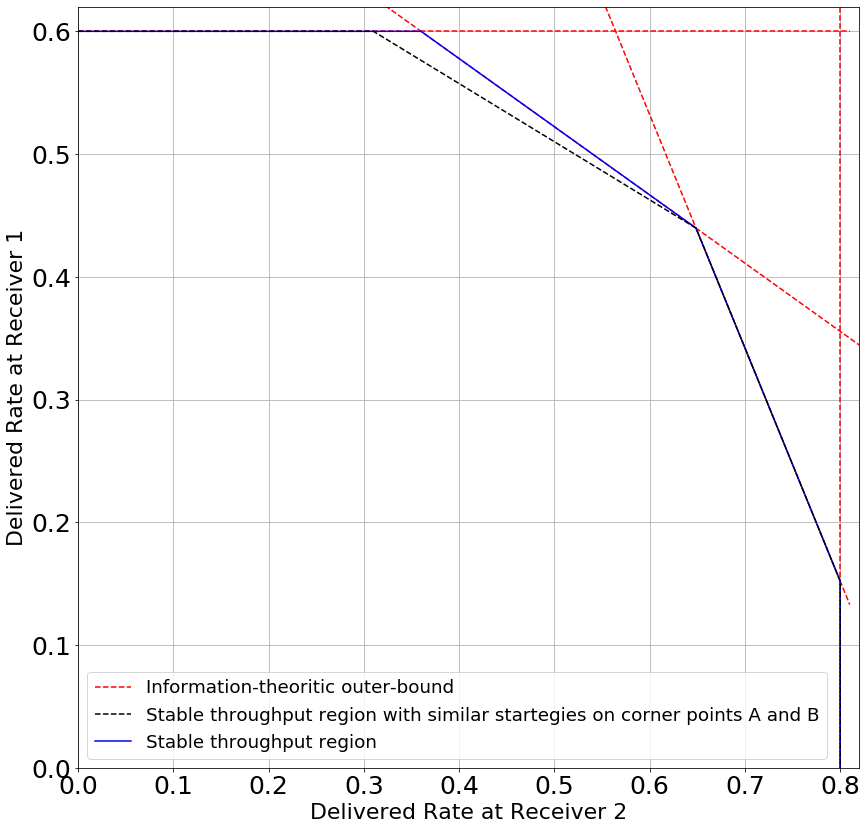

In [397]:
p_val_d_1=0.6
p_val_c_1=0.4

p_val_d_2=0.8
p_val_c_2=0.5
# ta=10k, te=1%, p=0.6
out_lambda_1= np.array([0.  ,  0.216 ,0.32 , 0.695,0.76,0.8  ])
out_lambda_2= np.array([0.6 ,   0.5771 ,0.5541  ,0.36,0.18,0   ])



## ---- Equation of capacity region upper bound ---- ## 

print('Equation of capacity region upper bound:')
print('R1+',(p_val_d_1+p_val_c_1-p_val_d_1*p_val_c_1)/p_val_c_1,'R2=',((p_val_d_1+p_val_c_1-p_val_d_1*p_val_c_1)*(p_val_d_2+p_val_c_1-p_val_d_2*p_val_c_1))/p_val_c_1)
print('R2+',(p_val_d_2+p_val_c_2-p_val_d_2*p_val_c_2)/p_val_c_2,'R1=',(p_val_d_2+p_val_c_2-p_val_d_2*p_val_c_2)*(p_val_d_1+p_val_c_2-p_val_d_1*p_val_c_2)/p_val_c_2)

plt.figure(figsize=(14,14))

## ---- Plot upper boundaries ---- ## 
def f1(t):
    return t*p_val-t*p_val_d_1+p_val_d_1
def f2(t):
    return -(p_val_d_1+p_val_c_1-p_val_d_1*p_val_c_1)/p_val_c_1*t+(p_val_d_1+p_val_c_1-p_val_d_1*p_val_c_1)*(p_val_d_2+p_val_c_1-p_val_d_2*p_val_c_1)/p_val_c_1
L1=np.arange(0,(p_val_d_2+0.02),0.01)
plt.plot(L1, f1(L1), '--r')  
plt.plot(L1,f2(L1),  '--r') 

## ---- Plot upper boundaries ---- ## 
def f1(t):
    return t*p_val_d_2-t*p_val_d_2+p_val_d_2
def f2(t):
    return -(p_val_d_2+p_val_c_2-p_val_d_2*p_val_c_2)/p_val_c_2*t+(p_val_d_2+p_val_c_2-p_val_d_2*p_val_c_2)*(p_val_d_1+p_val_c_2-p_val_d_1*p_val_c_2)/p_val_c_2
L1=np.arange(0,(p_val_d_2+0.02),0.01)
plt.plot(f1(L1),L1, '--r')
p0=plt.plot(f2(L1),L1,  '--r') 

plt.xlabel('Delivered Rate at Receiver 2')
plt.ylabel('Delivered Rate at Receiver 1')

#plt.plot(out_lambda_1, out_lambda_2, '-k')

out_lambda_1= np.array([0.  ,  0.36 , 0.6486,0.8,0.8  ])
out_lambda_2= np.array([0.6 ,   0.6  ,0.4397,0.152,0   ])
p1=plt.plot(out_lambda_1, out_lambda_2, '-b')


out_lambda_1= np.array([0.  ,  0.31 , 0.6486,0.8,0.8  ])
out_lambda_2= np.array([0.6 ,   0.6  ,0.4397,0.152,0   ])
p2=plt.plot(out_lambda_1, out_lambda_2, '--k')

plt.legend((p0[0],p2[0],p1[0]), ('Information-theoritic outer-bound','Stable throughput region with similar startegies on corner points A and B','Stable throughput region'),fontsize = 'small')

plt.rcParams.update({'font.size': 22})
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25)
plt.ylim(0, p_val_d_1+0.02);
plt.xlim(0, p_val_d_2+0.02)
plt.grid()
plt.show()

Equation of capacity region upper bound:
R1+ 1.4 R2= 1.176
R2+ 1.4 R1= 1.176


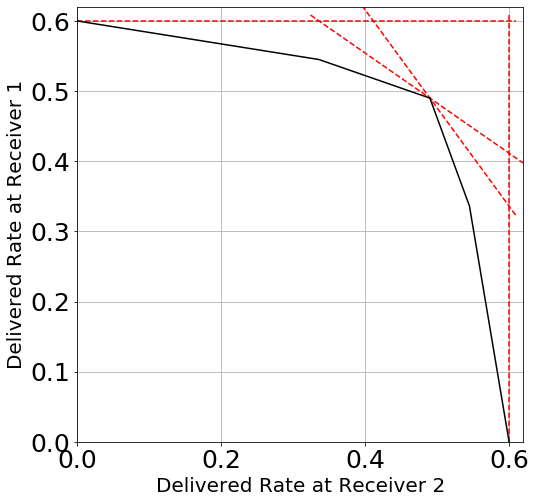

In [393]:
# ta=10k, te=1%, p=0.6
out_lambda_1= [0.  ,  0.168 ,0.336 ,0.413, 0.49,  0. ,   0. ,   0.,    0. ,   0.,    0. ,   0. ,   0.   ]
out_lambda_2= [0.6 ,   0.5725 ,0.545 , 0.5175 ,0.49  , 0.   ,  0.  ,   0.   ,  0.    , 0. , 0.  ,   0.  ,   0.    ]

count=0
a=1
b=0
while a!=0 or b!=0:
    a=out_lambda_1[count]
    b=out_lambda_2[count]
    count=count+1


out_lambda_11=out_lambda_1[:(count-1)]
out_lambda_22=out_lambda_2[:(count-1)]

## ---- Equation of capacity region upper bound ---- ## 

print('Equation of capacity region upper bound:')
print('R1+',(2*p_val-p_val**2)/p_val,'R2=',(2*p_val-p_val**2)**2/p_val)
print('R2+',(2*p_val-p_val**2)/p_val,'R1=',(2*p_val-p_val**2)**2/p_val)

plt.figure(figsize=(8,8))

## ---- Plot upper boundaries ---- ## 
def f1(t):
    return t*p_val-t*p_val+p_val
def f2(t):
    return -(2*p_val-p_val**2)/p_val*t+(2*p_val-p_val**2)**2/p_val
L1=np.arange(0,(p_val+0.02),0.01)
plt.plot(L1, f1(L1), '--r')  
plt.plot(f1(L1),L1,  '--r') 
plt.plot(L1, f2(L1), '--r')
plt.plot(f2(L1),L1,  '--r') 

plt.xlabel('Delivered Rate at Receiver 2')
plt.ylabel('Delivered Rate at Receiver 1')

plt.plot(out_lambda_22, out_lambda_11, '-k')
plt.plot(out_lambda_11, out_lambda_22, '-k')

plt.ylim(0, p_val+0.02);
plt.xlim(0, p_val+0.02)
plt.grid()
plt.show()

Equation of capacity region upper bound:
R1+ 2.4 R2= 1.728
R2+ 1.4 R1= 1.176


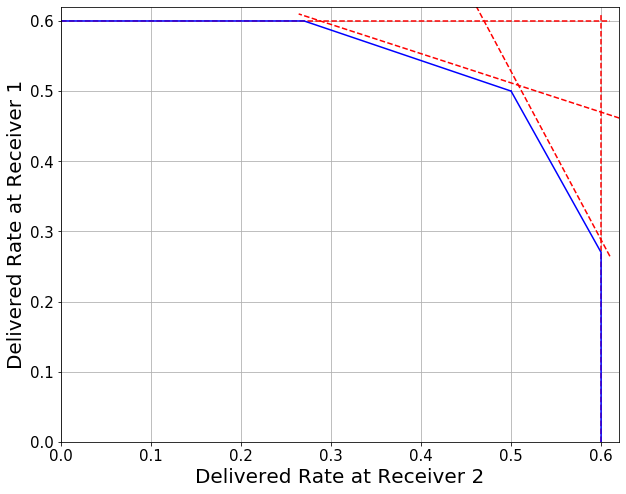

In [315]:
p_val_d=0.6
p_val_c=0.3
# ta=10k, te=1%, p=0.6
out_lambda_1= [0.  ,  0.216 ,0.32 , 0.472,  0. ,   0. ,   0.,    0. ,   0.,    0. ,   0. ,   0.   ]
out_lambda_2= [0.6 ,   0.5771 ,0.5541  ,0.472  , 0.   ,  0.  ,   0.   ,  0.    , 0. , 0.  ,   0.  ,   0.    ]

count=0
a=1
b=0
while a!=0 or b!=0:
    a=out_lambda_1[count]
    b=out_lambda_2[count]
    count=count+1


out_lambda_11=out_lambda_1[:(count-1)]
out_lambda_22=out_lambda_2[:(count-1)]

## ---- Equation of capacity region upper bound ---- ## 

print('Equation of capacity region upper bound:')
print('R1+',(p_val_d+p_val_c-p_val_d*p_val_c)/p_val_c,'R2=',((p_val_d+p_val_c-p_val_d*p_val_c)**2)/p_val_c)
print('R2+',(2*p_val-p_val**2)/p_val,'R1=',(2*p_val-p_val**2)**2/p_val)

plt.figure(figsize=(10,8))

## ---- Plot upper boundaries ---- ## 
def f1(t):
    return t*p_val-t*p_val+p_val
def f2(t):
    return -(p_val_d+p_val_c-p_val_d*p_val_c)/p_val_c*t+((p_val_d+p_val_c-p_val_d*p_val_c)**2)/p_val_c
L1=np.arange(0,(p_val+0.02),0.01)
plt.plot(L1, f1(L1), '--r')  
plt.plot(f1(L1),L1,  '--r') 
plt.plot(L1, f2(L1), '--r')
plt.plot(f2(L1),L1,  '--r') 

plt.xlabel('Delivered Rate at Receiver 2')
plt.ylabel('Delivered Rate at Receiver 1')

#plt.plot(out_lambda_22, out_lambda_11, '-k')
#plt.plot(out_lambda_11, out_lambda_22, '-k')

out_lambda_1= [0.  ,  0.27 , 0.5,  0. ,   0. ,   0.,    0. ,   0.,    0. ,   0. ,   0.   ]
out_lambda_2= [0.6 ,   0.6 ,0.5  , 0.   ,  0.  ,   0.   ,  0.    , 0. , 0.  ,   0.  ,   0.    ]
count=0
a=1
b=0
while a!=0 or b!=0:
    a=out_lambda_1[count]
    b=out_lambda_2[count]
    count=count+1


out_lambda_11=out_lambda_1[:(count-1)]
out_lambda_22=out_lambda_2[:(count-1)]
plt.plot(out_lambda_22, out_lambda_11, '-b')
plt.plot(out_lambda_11, out_lambda_22, '-b')
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.ylim(0, p_val+0.02);
plt.xlim(0, p_val+0.02)
plt.grid()
plt.show()